In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk

In [3]:
nltk.download('punkt') #package for english language

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
text="Welcome to our AI class. I hope you found it interesting. Please do reply!"

In [5]:
#Tokenization
text.split()

['Welcome',
 'to',
 'our',
 'AI',
 'class.',
 'I',
 'hope',
 'you',
 'found',
 'it',
 'interesting.',
 'Please',
 'do',
 'reply!']

In [6]:
text.upper()

'WELCOME TO OUR AI CLASS. I HOPE YOU FOUND IT INTERESTING. PLEASE DO REPLY!'

In [7]:
text.lower()

'welcome to our ai class. i hope you found it interesting. please do reply!'

In [8]:
#Tokenization
text.split('.') #it seperate sentences

['Welcome to our AI class',
 ' I hope you found it interesting',
 ' Please do reply!']

In [9]:
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize(text)

In [56]:
from nltk.tokenize import TreebankWordTokenizer

In [59]:
tk=TreebankWordTokenizer()

In [ ]:
tk.tokenize(text)

In [13]:
#Stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.corpus.stopwords.words("english") #you can try arabic and all

In [ ]:
nltk.corpus.stopwords.words("arabic")

In [24]:
#Lemma and Stemma - Remove prefixes and suffixes and remove tense / time 
#Lemma-Go gone went,(will convert gone, went to go)
#Stemma-work, worked working (Remove prefixes and suffixes)

In [23]:
from nltk.stem import PorterStemmer

In [25]:
PorterStemmer().stem('happiness')

'happi'

In [26]:
from nltk.stem import RegexpStemmer

In [28]:
rs=RegexpStemmer('ing')

In [29]:
rs.stem("working")

'work'

In [30]:
#POS- Part of Speech

In [31]:
text2=word_tokenize(text)

In [62]:
text2

['Welcome',
 'to',
 'our',
 'AI',
 'class',
 '.',
 'I',
 'hope',
 'you',
 'found',
 'it',
 'interesting',
 '.',
 'Please',
 'do',
 'reply',
 '!']

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
nltk.pos_tag(text2)

In [37]:
#pip install autocorrect

In [38]:
from autocorrect import spell

In [41]:
spell('congradulations')

autocorrect.spell is deprecated,             use autocorrect.Speller instead


'congratulations'

In [42]:
#pip install textblob

In [43]:
from textblob import TextBlob

In [44]:
b=TextBlob('I havee goad speling')

In [45]:
b.correct()

TextBlob("I have good spelling")

In [47]:
#pip install langdetect

In [48]:
from langdetect import detect

In [49]:
detect("Hellow World")

'en'

In [52]:
detect("Merhaba Dunya")

'id'

In [55]:
detect("Bonjour")

'hr'

In [67]:
detect("سافؤاى") # I meant my name in arabic

'ar'

In [ ]:
#TF -- IDF

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [70]:
tr=TextBlob(text)

In [72]:
tr.translate(from_lang='en', to='hi')

TextBlob("हमारे एआई वर्ग में आपका स्वागत है। मुझे आशा है कि आपको यह दिलचस्प लगा होगा। कृपया उत्तर दें!")

In [73]:
#pip install googletrans  - if you download this you can use google translater

In [74]:
tr.translate(from_lang='en', to='ar')

TextBlob("مرحبا بكم في فصل الذكاء الاصطناعي لدينا. آمل أن تكون قد وجدت أنها مثيرة للاهتمام. الرجاء القيام بالرد!")

In [75]:
#TF- Term Frequency -IDF Inverse Document Frequency

In [76]:
st=['Call you tonight','Call me a cab','Please call me... Please']

In [77]:
vect=CountVectorizer()

In [78]:
import pandas as pd
import numpy as np

In [84]:
tf=pd.DataFrame(vect.fit_transform(st).toarray(),columns=vect.get_feature_names_out())


In [85]:
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [86]:
df=vect.fit_transform(st).toarray().sum(axis=0) #axis=0 rows, axis=1 columns

In [87]:
df

array([1, 3, 2, 2, 1, 1])

In [91]:
pd.DataFrame(df.reshape(1,6),columns=vect.get_feature_names_out()) #converting df array to dataframe

,cab,call,me,please,tonight,you
0,1,3,2,2,1,1


In [88]:
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,1.0,0.0,0.0


In [89]:
#when you remove stopwards you get keywords

In [92]:
import pandas as pd

In [93]:
df=pd.read_csv('yelp.csv')

In [94]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [101]:
df['text'][0] #backslash ignores ' etc on sql

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [99]:
import seaborn as sns

<Axes: xlabel='stars', ylabel='count'>

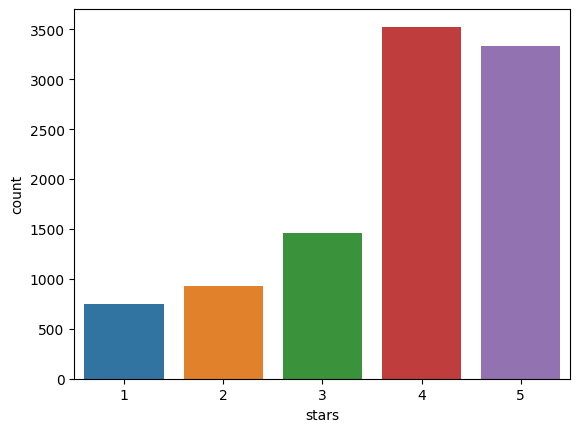

In [102]:
sns.countplot(x=df['stars'])

In [103]:
df['text']=df['text'].str.lower()

In [105]:
df['text'][3]

"rosie, dakota, and i love chaparral dog park!!! it's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\n\nthe scottsdale park and rec dept. does a wonderful job of keeping the park clean and shaded.  you can find trash cans and poopy-pick up mitts located all over the park and paths.\n\nthe fenced in area is huge to let the dogs run, play, and sniff!"

In [106]:
#remove punctuations
df['text']=df['text'].str.replace('[^\w\s]','')

<ipython-input-106-d460c0b4f6c9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[^\w\s]','')


In [108]:
df['text']=df['text'].str.replace('\d+','') #remove numbers

<ipython-input-108-418b882d912b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('\d+','') #remove numbers


In [111]:
df['text']=df['text'].str.replace('\n','').replace('\r','')  #\r- return

In [110]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate rice is so good and i also...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [112]:
#motive- if anyone types negative reviews, you'll know it before the guy submits so that you can avoid negative reviews

In [115]:
#we are converting to lower case so that computer recognises the word as one, Eg: otherwise they'll treat Call and call as another words

In [113]:
df2=df[(df['stars']==1)|(df['stars']==5)]

In [114]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate rice is so good and i also...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [117]:
x=df2[['text']]

In [120]:
y=df2[['stars']]  # 2 [] for showing it as a table, otherwise they'll treat as array

In [ ]:
x

In [122]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [160]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=3) #looking 2 words 

In [161]:
x_v=vect.fit_transform(x.text)

In [162]:
tf=pd.DataFrame(x_v.toarray(),columns=vect.get_feature_names_out())

In [163]:
tf

,aaron,abandoned,ability,able,able eat,able enjoy,able make,able say,able try,able walk,...,zen,zero,zero stars,zinburger,zinc,zipps,zone,zoo,zucchini,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
x_v #we have to convert it to a dataframe

<4086x13876 sparse matrix of type '<class 'numpy.int64'>'
	with 209324 stored elements in Compressed Sparse Row format>

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x_v,y,test_size=0.20, random_state=42)

In [167]:
from sklearn.naive_bayes import MultinomialNB #If your data is not 1 or 0, 1 or 5

In [168]:
nb=MultinomialNB()

In [169]:
nb.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [170]:
pred=nb.predict(x_test)

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
accuracy_score(pred,y_test)

0.9119804400977995

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
lr=LogisticRegression()

In [175]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [176]:
pred=lr.predict(x_test)

In [177]:
accuracy_score(pred,y_test)

0.9046454767726161

In [184]:
def summarize():
    yelp=df2
    #choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        #review_text = unicode(yelp.text[review_id], 'utf-8') #Python 2
        review_text = str(yelp.text[review_id]) #Python3
        review_length = len(review_text)
        
    #create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
            
    #print words with the top 5 TF-IDF scores
    print ('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print (word)
        
    #print the review
    print ('\n' + review_text)


In [ ]:
summarize()

In [186]:
#Sentiment Analysis : + - 0

In [ ]:
TextBlob('I hate you').sentiment.polarity

In [ ]:
TextBlob('I love you').sentiment.polarity

In [ ]:
TextBlob('You are the best').sentiment.polarity

In [ ]:
TextBlob('I am the worst').sentiment #subjectivity represent your view

In [193]:
TextBlob('Burak Obama went to Spain').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [194]:
df.text[0]

'my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the betterdo yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazingwhile everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever hadanyway i cant wait to go back'

In [195]:
TextBlob(df.text[0]).sentiment

Sentiment(polarity=0.3906666666666666, subjectivity=0.65584126984127)

In [196]:
df.sample(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
5732,BicQSnGZnY_yuGEDkhVfnA,2011-01-10,LQXYeMf2IztWXQrQZGgfyA,2,it was christmas eve and we were hungry so we ...,review,OUdHM_gKTfTQ-hHZHqczsA,1,1,1
4248,Nj6ITW0Zhl7LpovGIH6SAg,2010-08-16,X-ZT6XrnXW0c1sbb6oTavQ,4,the biggest tip for last chance is to go in wi...,review,wha2RtvuIpEzekV4tmTFpQ,1,0,0
1969,jvvh4Q00Hq2XyIcfmAAT2A,2011-09-04,iL4a5Bzhv0FnpDLDP0Agbg,3,i went to five guys for the first time north s...,review,-GuI1BlfyPGhvgYXA4LhSA,0,2,0
887,rZbHg4ACfN3iShdsT47WKQ,2011-07-08,ca_6nisikghrwKd9w0OAqg,5,i have never had bbq in the south texas or any...,review,upG0mzEpQFpoSZXRv2pfaw,0,1,0
7579,XfgU_1_X8eVX8_CqofAeIQ,2010-05-18,WilRu3WdeeEliLtIVEwRvA,1,ok im not getting the great reviews on this pl...,review,oubVUZ_h4enNSrvWNo6_og,0,1,0


In [198]:
df.text[3539]

'so the food at this place is good well the sliced turkey sud but when it came to delivery and internet ordering oh my god the incompetence of these people after and hour  mins after the food was suppose to be delivered the order was  turkey subs and garlic cheese bread i called and was told that there was no delivery guy and if i can come pick it up that they would knock off  but the foods not ready yet how long does it take to make  subs so i pick up the goods and damned if i didnt check the bag they didnt give me the nd sub ugh they never checked the order if you have online ordering  you need to follow though so with a second phone call and a second trip to the place and  hrs after the original order i finally get home and eat the only good thing i got was a free lunch  for that i give them a '

In [199]:
TextBlob(df.text[3539]).sentiment

Sentiment(polarity=0.20249999999999999, subjectivity=0.565)